In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#read the housing data into a DataFrame

train = pd.read_csv('train.csv')
train_id = train['Id']

In [56]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [58]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [59]:
train.SalePrice.median()

163000.0

In [60]:
train.SalePrice.mode()

0    140000
dtype: int64

In [61]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

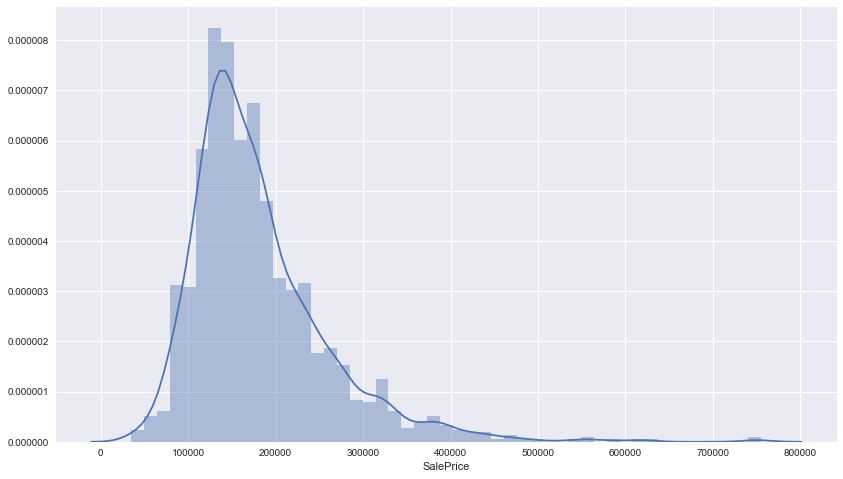

In [62]:
sns.set(font_scale=1)
plt.figure(figsize=(14,8))
sns.distplot(train.SalePrice);

In [63]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [64]:
train.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0ead2a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a6f785c50>]], dtype=object)

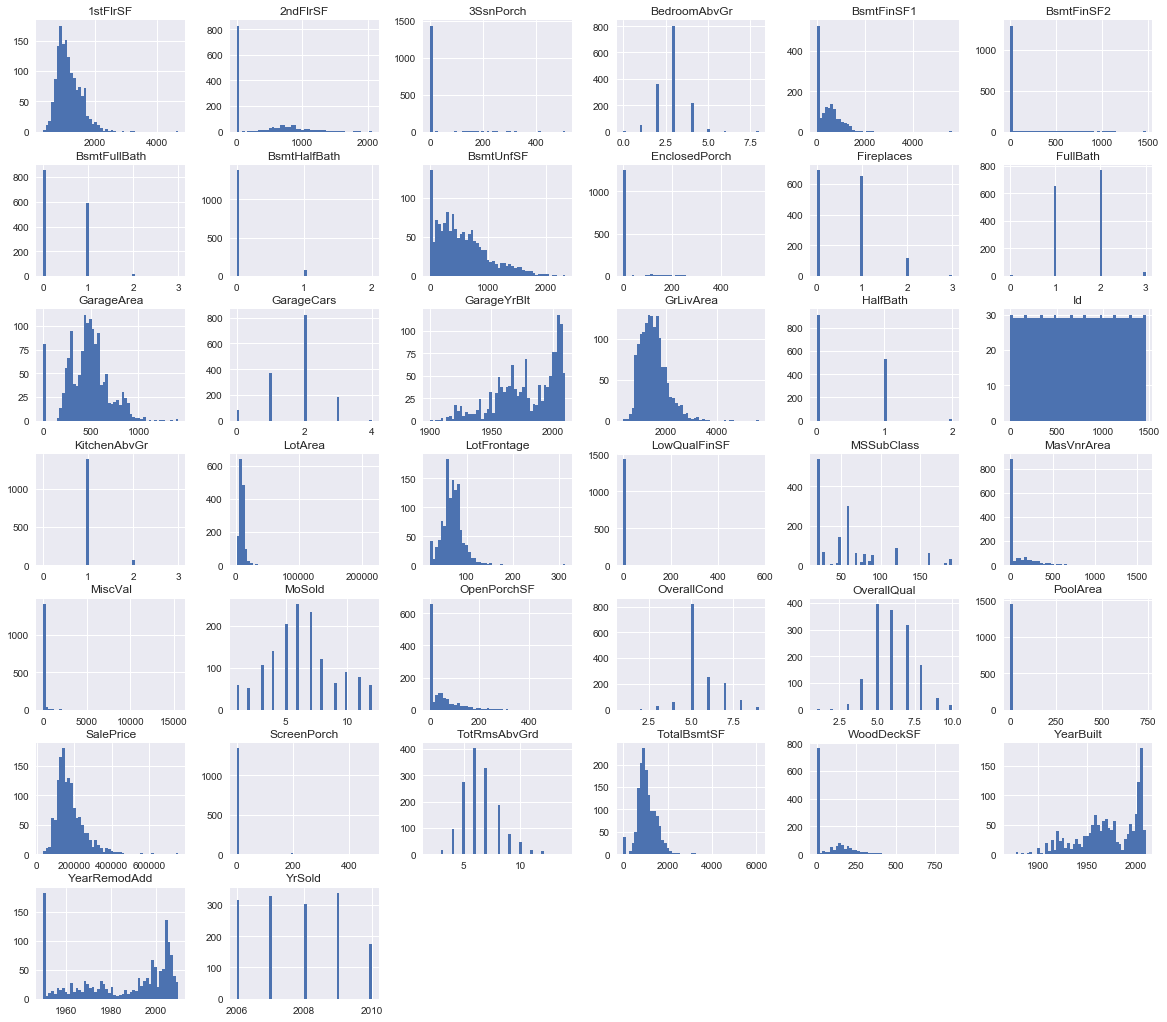

In [65]:
#histogram will tell us how often features occur in the data set

train.hist(figsize=(20,18), bins =50)



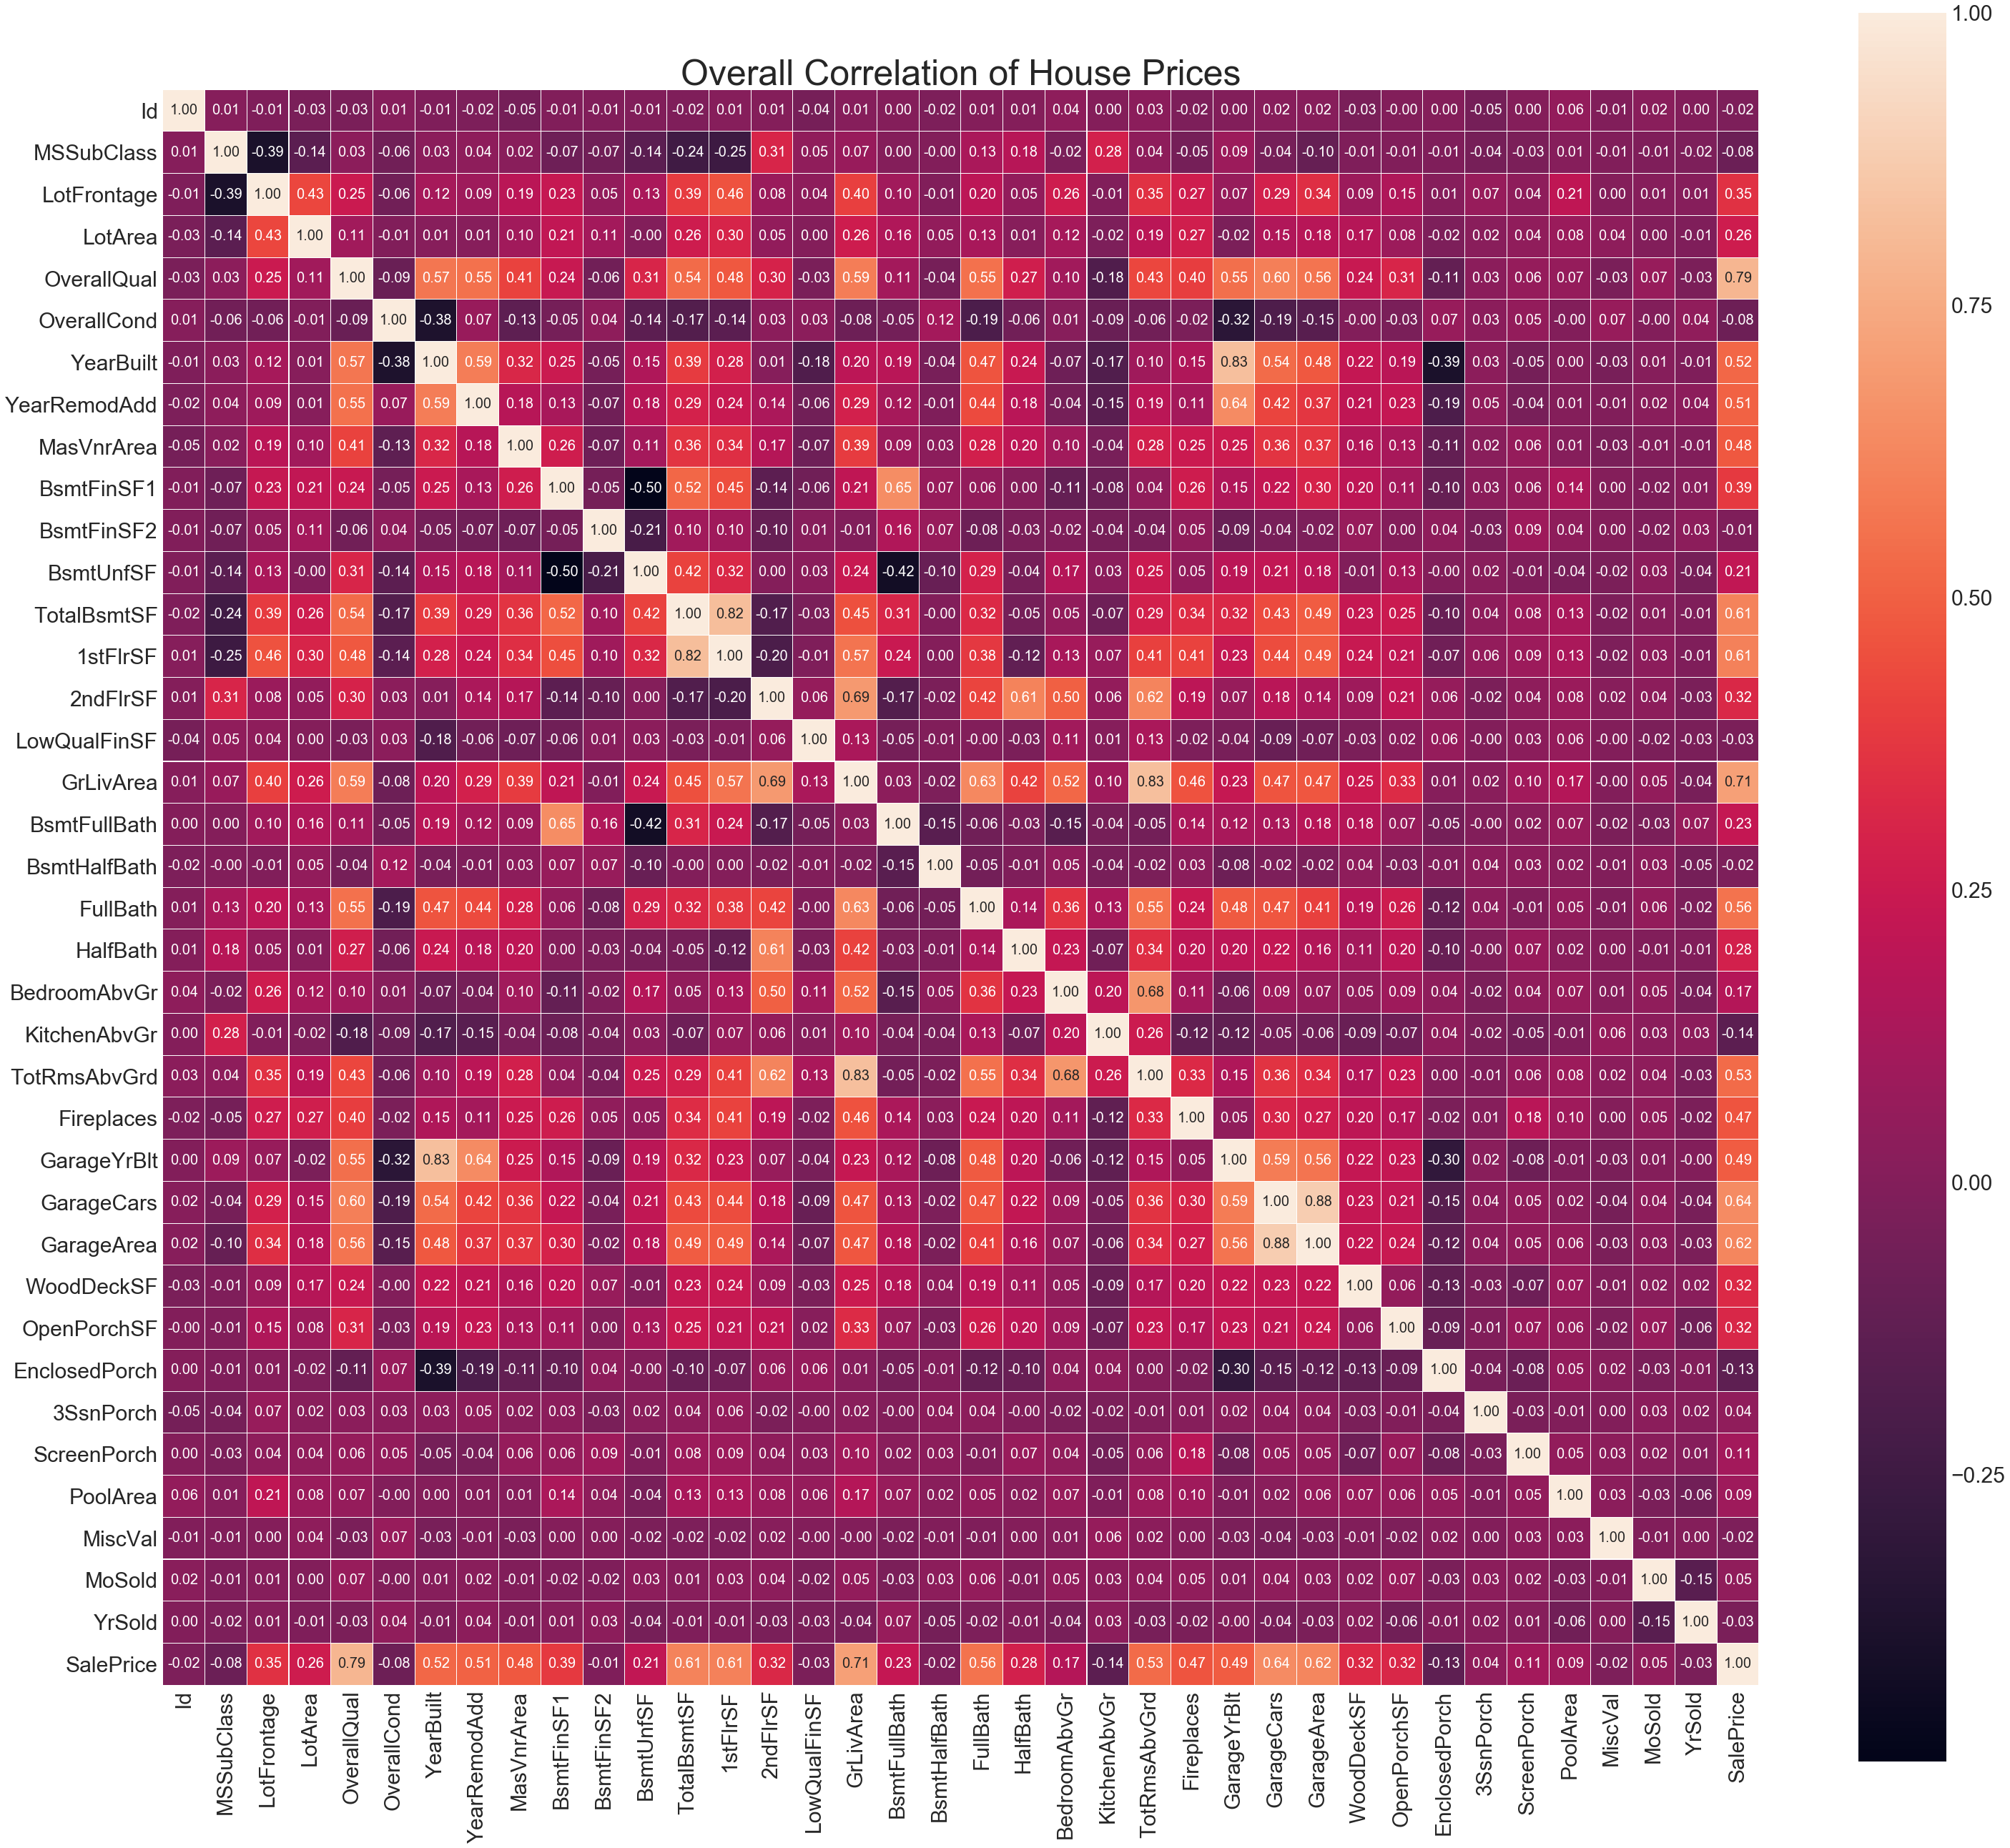

In [66]:
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(50,45))
plt.title('Overall Correlation of House Prices', fontsize=50)
sns.heatmap(train.corr(), vmax=1, square=True, linewidths=.05, annot=True, 
            fmt='.2f', annot_kws={'size': 20});

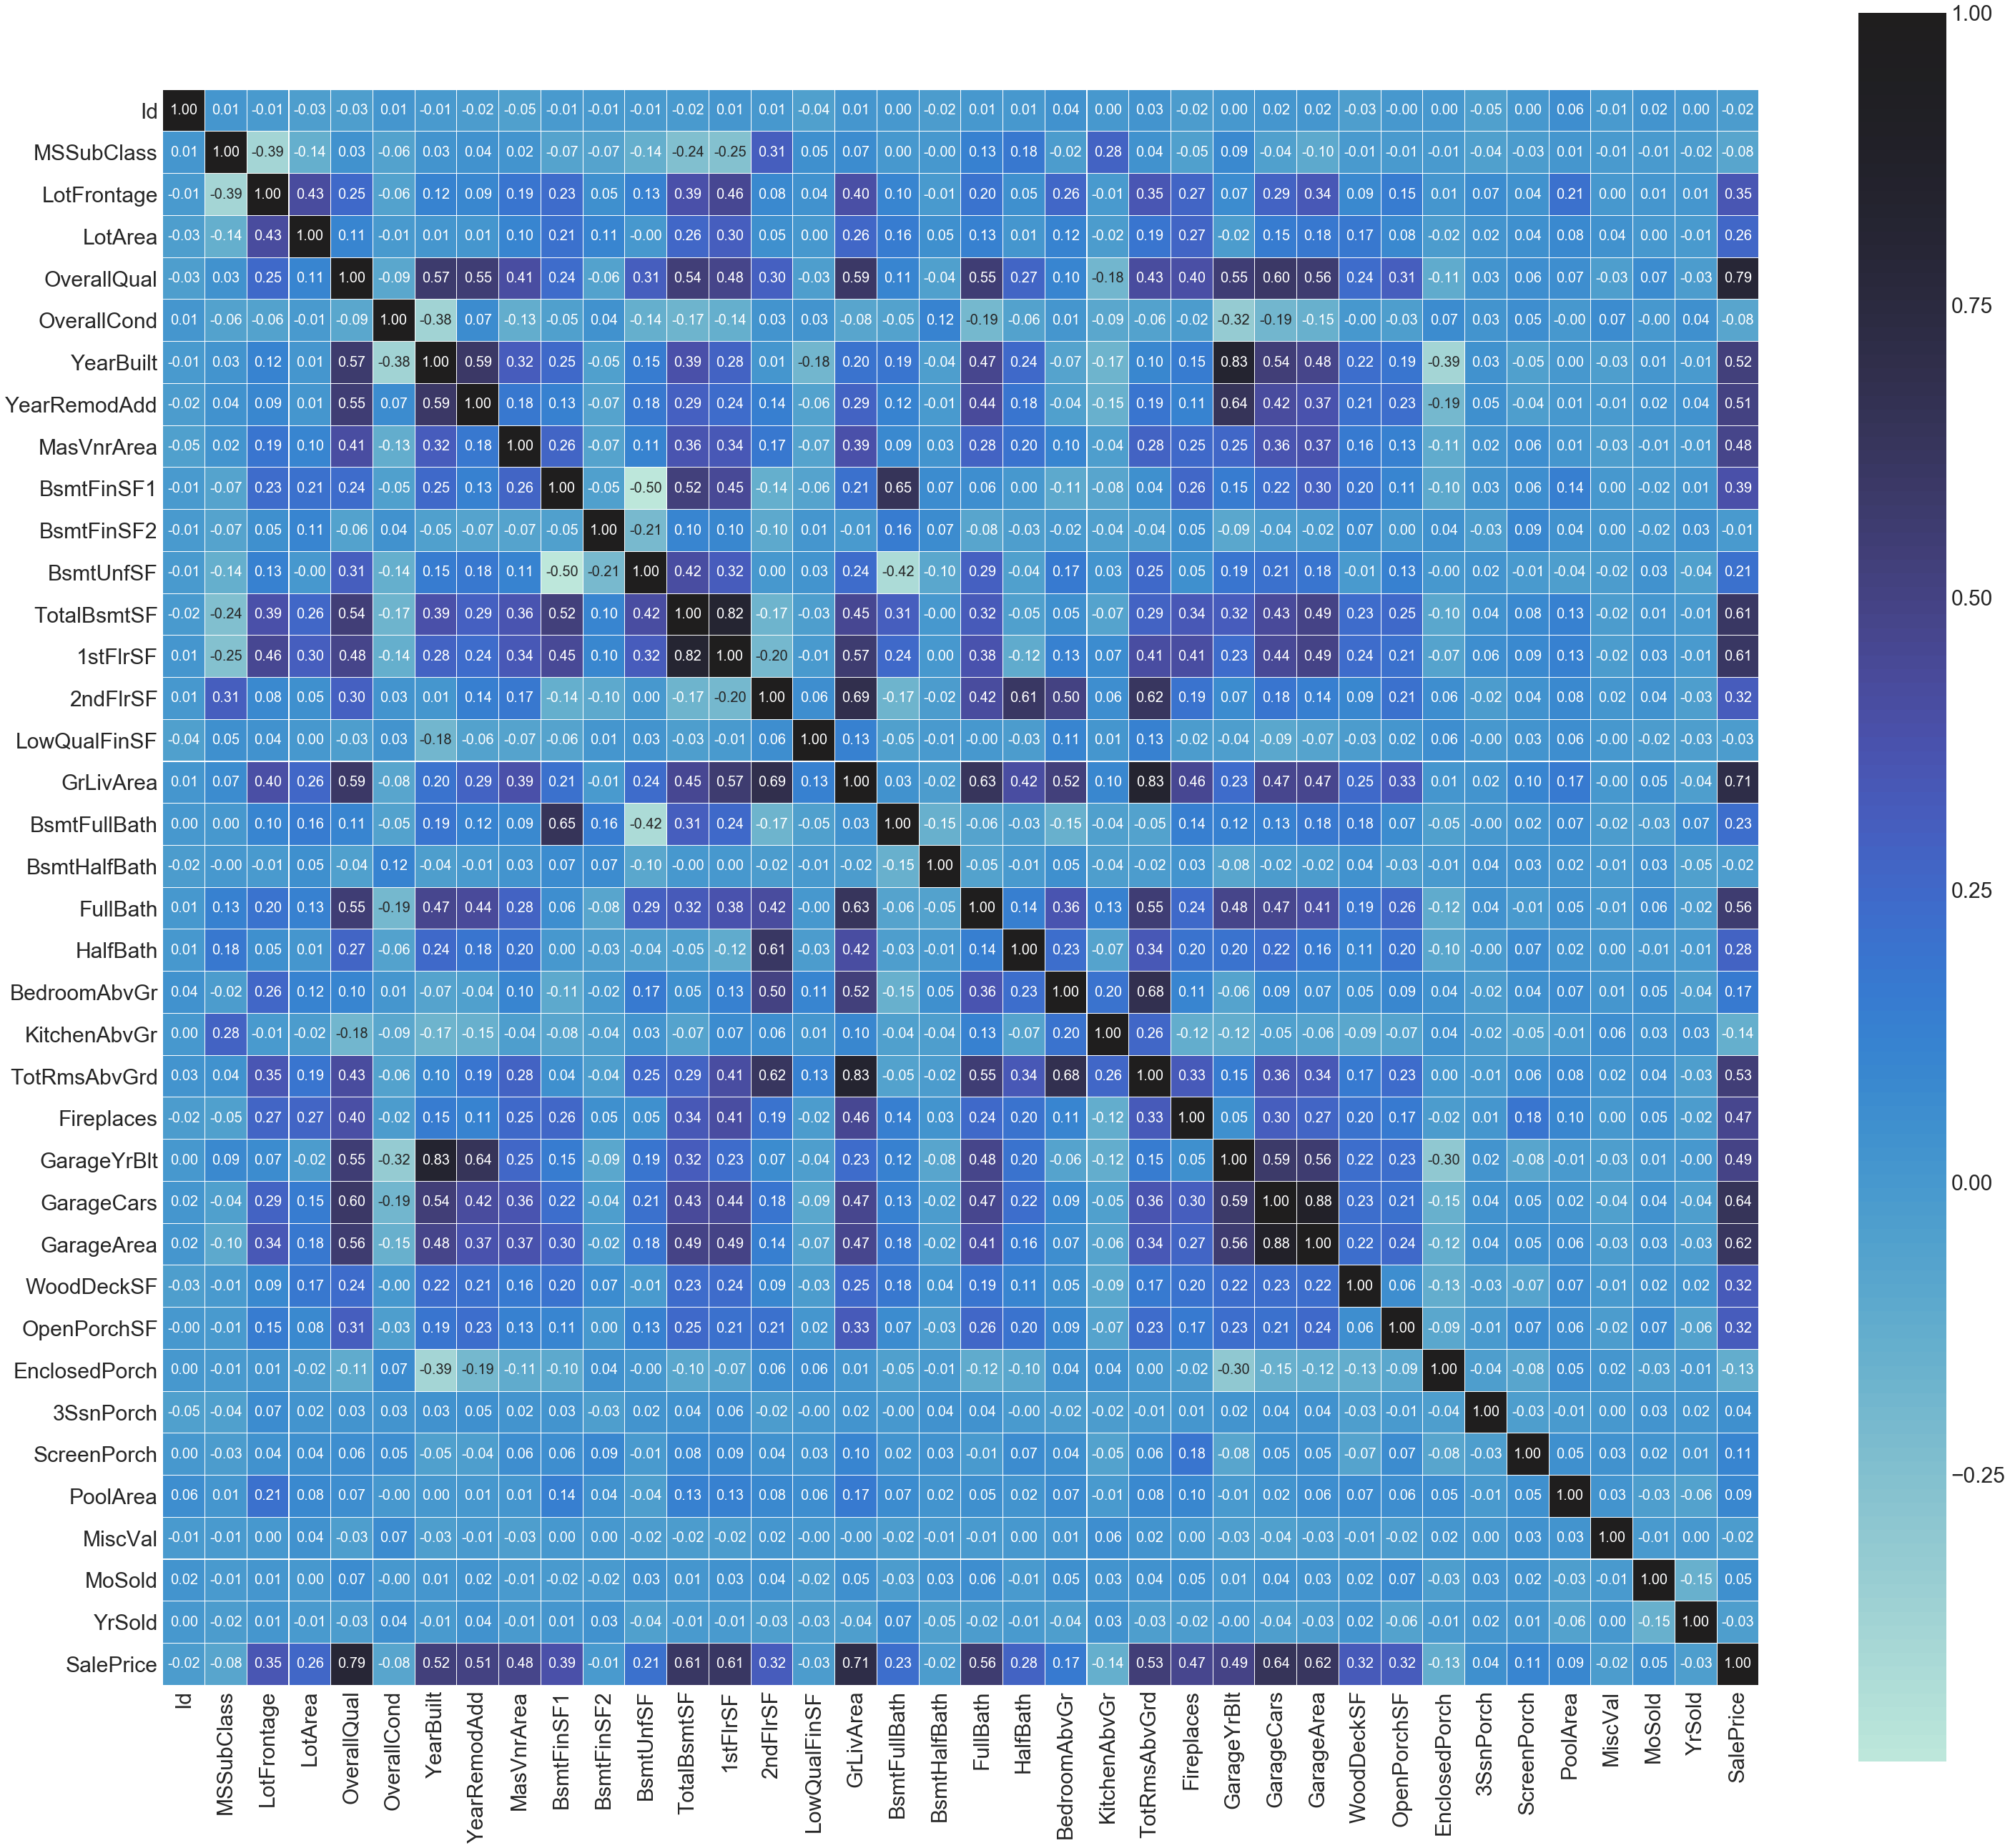

In [67]:
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(50,45))
sns.heatmap(train.corr(), center=1, square=True, linewidths=.05, annot=True, 
            fmt='.2f', annot_kws={'size': 20});

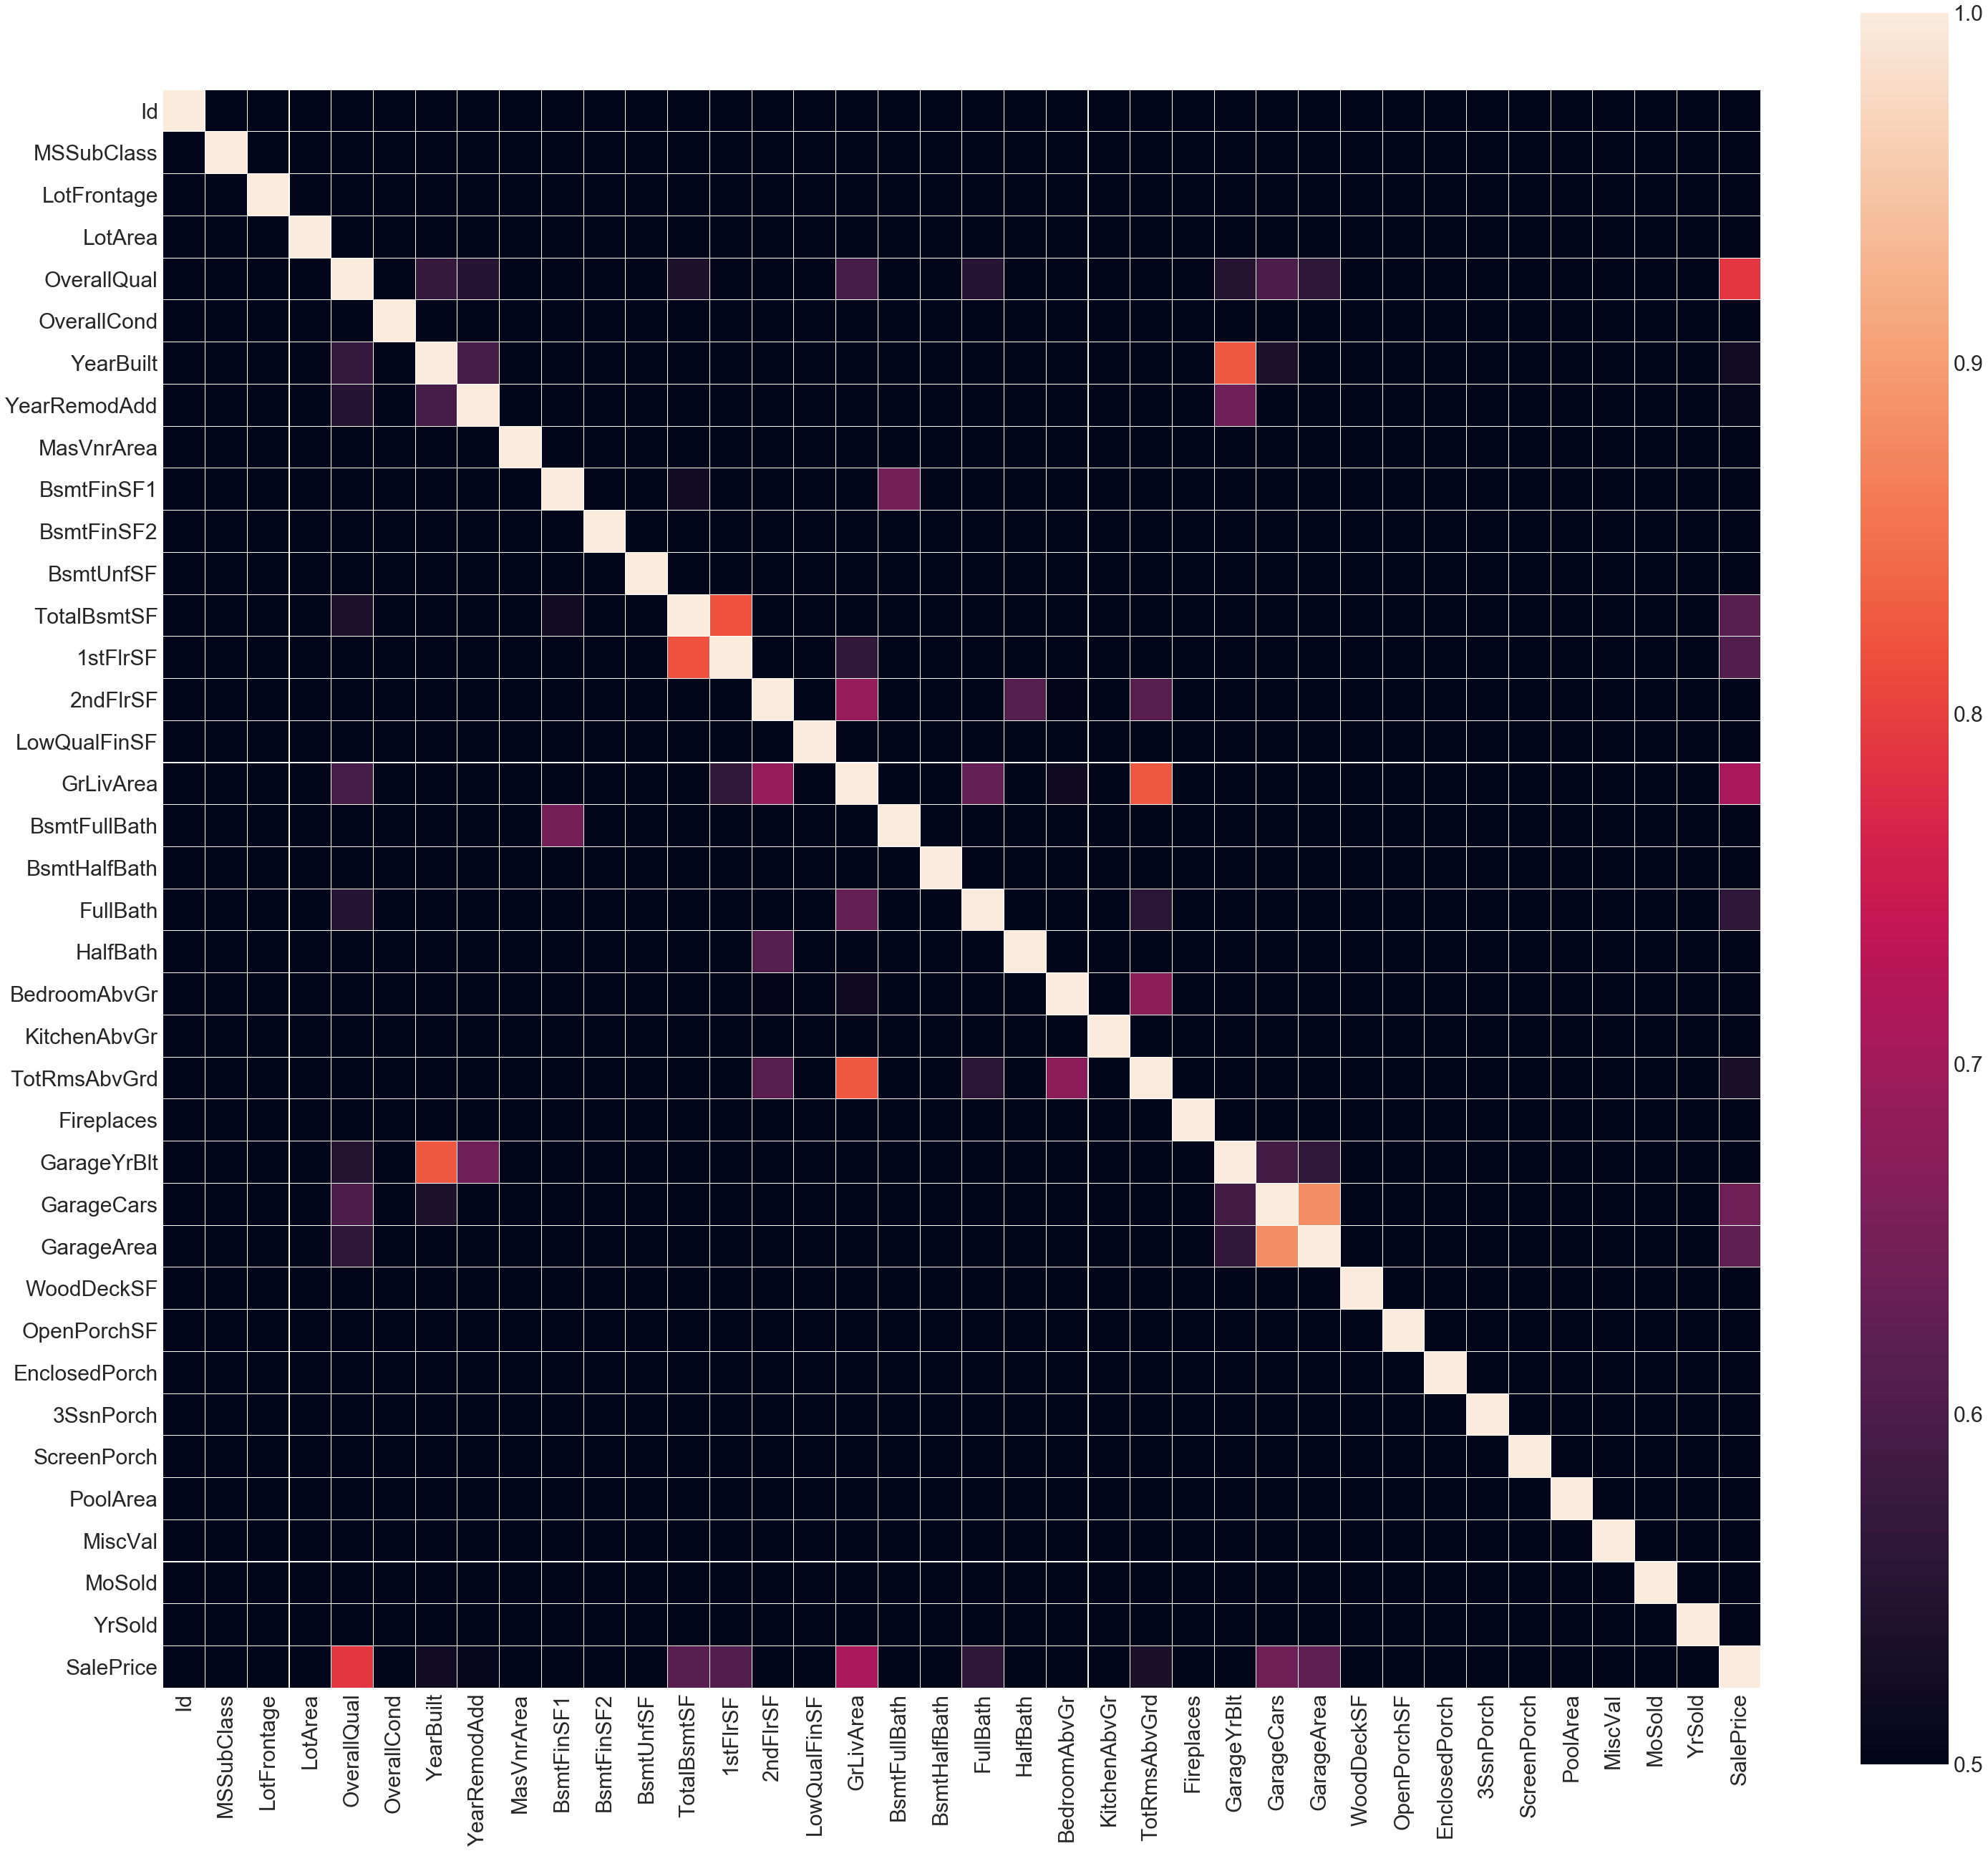

In [68]:
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(50,45))
sns.heatmap(train.corr(), vmin=.5, vmax=1, square=True, linewidths=.05);

In [69]:
"""Findings:
Variables highly correlated to SalePrice:
OverallQual = 0.79
YearBuilt = 0.52
YearRemodAdd = 0.51
TotalBsmtSF = 0.61
1stFlrSF = 0.61
GrLivArea = 0.71
FullBath = 0.56
TotRmsAbvGr = 0.53
GarageCars = 0.64
GarageArea = 0.62

Least correlated to SalesPrice:
KitchenAbvGr = -0.14
EnclosedPorch = -0.13

"""

'Findings:\nVariables highly correlated to SalePrice:\nOverallQual = 0.79\nYearBuilt = 0.52\nYearRemodAdd = 0.51\nTotalBsmtSF = 0.61\n1stFlrSF = 0.61\nGrLivArea = 0.71\nFullBath = 0.56\nTotRmsAbvGr = 0.53\nGarageCars = 0.64\nGarageArea = 0.62\n\nLeast correlated to SalesPrice:\nKitchenAbvGr = -0.14\nEnclosedPorch = -0.13\n\n'

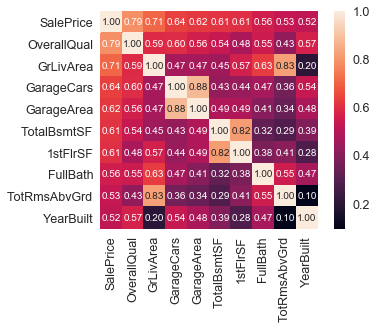

In [70]:
k = 10 #number of variables for heatmap
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


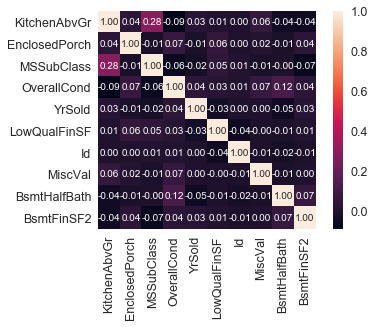

In [71]:
k = 10 #number of variables for heatmap
cols = train.corr().nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [72]:
""" findings: Variables highly correlated to SalePrice:
OverallQual = 0.79
YearBuilt = 0.52
YearRemodAdd = 0.51
TotalBsmtSF = 0.61
1stFlrSF = 0.61
GrLivArea = 0.71
FullBath = 0.56
TotRmsAbvGr = 0.53
GarageCars = 0.64
GarageArea = 0.62 


Mulitcolinarity: 

GarageCars and Garage Area = .88
TotalBsmtSF and 1stFlrSF = .82
TotRmsAbvGr and GrLivArea (SF above ground living area) = .83  **means that for most houses in this data set- the primary SF above ground is in rooms)
"""

' findings: Variables highly correlated to SalePrice:\nOverallQual = 0.79\nYearBuilt = 0.52\nYearRemodAdd = 0.51\nTotalBsmtSF = 0.61\n1stFlrSF = 0.61\nGrLivArea = 0.71\nFullBath = 0.56\nTotRmsAbvGr = 0.53\nGarageCars = 0.64\nGarageArea = 0.62 \n\n\nMulitcolinarity: \n\nGarageCars and Garage Area = .88\nTotalBsmtSF and 1stFlrSF = .82\nTotRmsAbvGr and GrLivArea (SF above ground living area) = .83  **means that for most houses in this data set- the primary SF above ground is in rooms)\n'

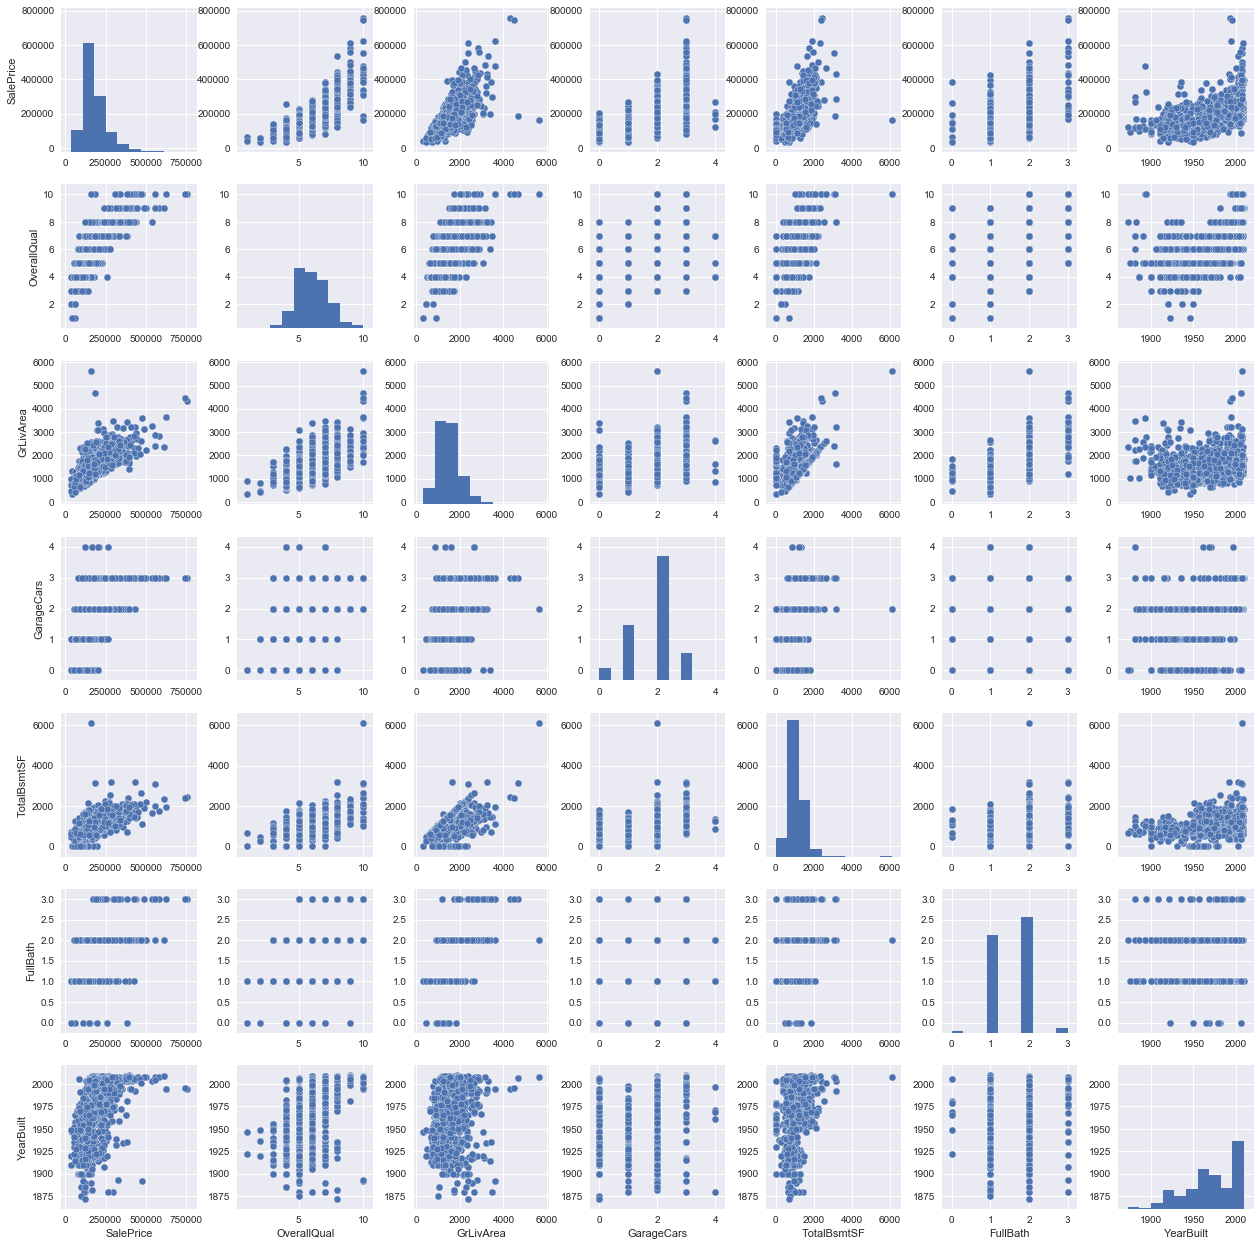

In [73]:
#scatter plots to show the correlation patterns - using the top 

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [74]:
#missing data
totalmissing = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

# reate a missing data variable (data frame?) - only need to show top 20 bc they are in decending order 

missing_data = pd.concat([totalmissing, percent], axis=1, keys=['Total Missing', 'Percent Missing'])
missing_data.head(20)

Total Missing  Percent Missing
PoolQC                 1453         0.995205
MiscFeature            1406         0.963014
Alley                  1369         0.937671
Fence                  1179         0.807534
FireplaceQu             690         0.472603
LotFrontage             259         0.177397
GarageCond               81         0.055479
GarageType               81         0.055479
GarageYrBlt              81         0.055479
GarageFinish             81         0.055479
GarageQual               81         0.055479
BsmtExposure             38         0.026027
BsmtFinType2             38         0.026027
BsmtFinType1             37         0.025342
BsmtCond                 37         0.025342
BsmtQual                 37         0.025342
MasVnrArea                8         0.005479
MasVnrType                8         0.005479
Electrical                1         0.000685
Utilities                 0         0.000000

In [75]:
""" Findings: Can we delete any of these variables that have large amounts of data missings?
6 variables with > 10% data missing 

Several "Garage variables" and "basement variables" - we have a garage and basement variable in our highest variables, so we will delete these
Mas varibles = masonry types and area - not highly correlated so will delete
Electrical = not highly correlated, will delete 


"""

' Findings: Can we delete any of these variables that have large amounts of data missings?\n6 variables with > 10% data missing \n\nSeveral "Garage variables" and "basement variables" - we have a garage and basement variable in our highest variables, so we will delete these\nMas varibles = masonry types and area - not highly correlated so will delete\nElectrical = not highly correlated, will delete \n\n\n'

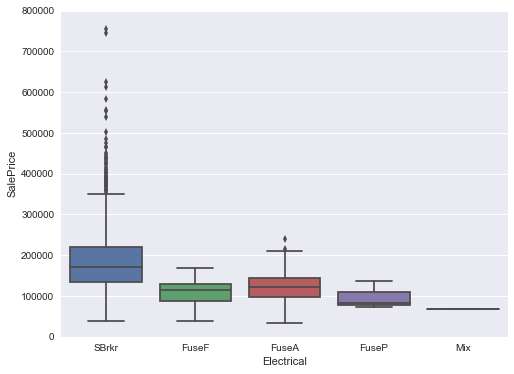

In [76]:
var = 'Electrical'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [80]:
'''findings - seems that houses without SBrkr do not sell for > 250,000. 
Wnat to keep this variable'''

'findings - seems that houses without SBrkr do not sell for > 250,000. \nWnat to keep this variable'

In [82]:
#create a new data set with missing values deleted
#deleting any variables with more than one missing value
#deleting the 1 missing value in Electrical

trainnew = train.drop((missing_data[missing_data['Total Missing'] > 1]).index,1)
trainnew = trainnew.drop(trainnew.loc[train['Electrical'].isnull()].index)

#output amount of null values in the train dataset 
trainnew.isnull().sum().max() 

0

In [84]:
# as we noticed before, the data is skewed to the right. We will apply log transformation
trainnew['SalePrice'] = np.log(trainnew['SalePrice'])

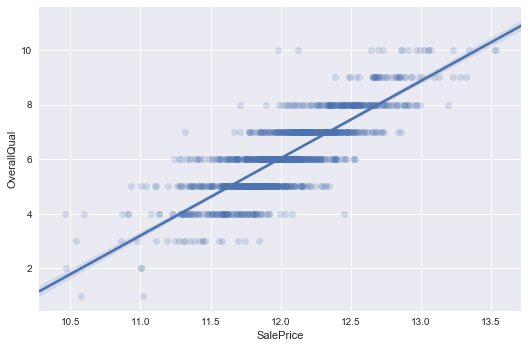

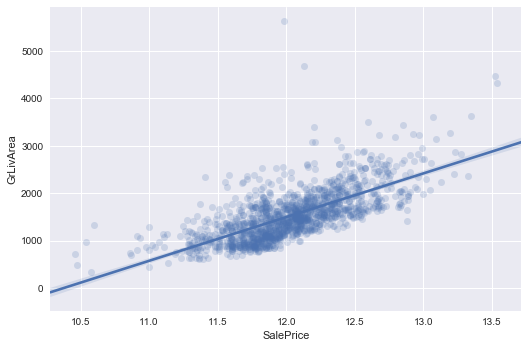

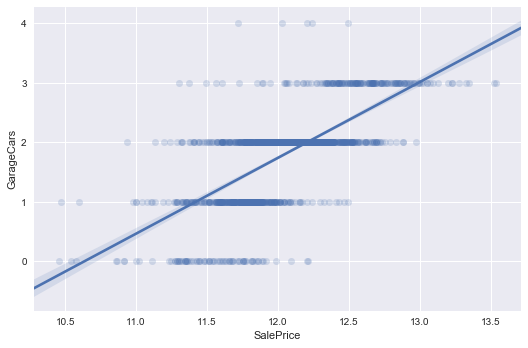

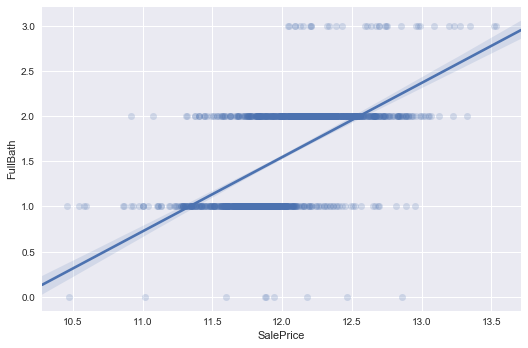

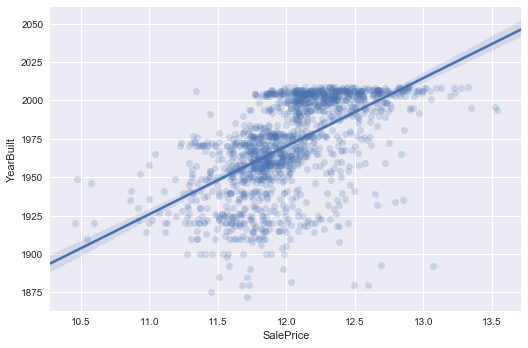

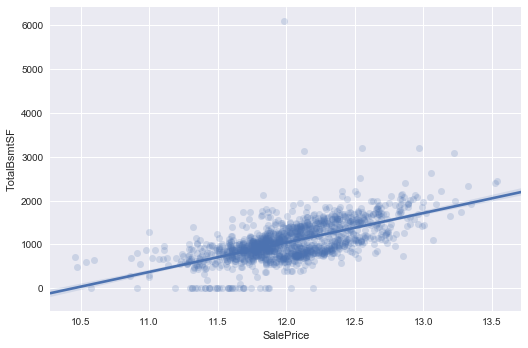

In [98]:
sns.lmplot(x='SalePrice', y='OverallQual', data=trainnew, aspect=1.5, scatter_kws={'alpha':0.2});
sns.lmplot(x='SalePrice', y='GrLivArea', data=trainnew, aspect=1.5, scatter_kws={'alpha':0.2});
sns.lmplot(x='SalePrice', y='GarageCars', data=trainnew, aspect=1.5, scatter_kws={'alpha':0.2});
sns.lmplot(x='SalePrice', y='FullBath', data=trainnew, aspect=1.5, scatter_kws={'alpha':0.2});
sns.lmplot(x='SalePrice', y='YearBuilt', data=trainnew, aspect=1.5, scatter_kws={'alpha':0.2});
sns.lmplot(x='SalePrice', y='TotalBsmtSF', data=trainnew, aspect=1.5, scatter_kws={'alpha':0.2});


In [123]:
#sanity check  

y.describe()

count    1459.000000
mean       12.024048
std         0.399589
min        10.460242
25%        11.774905
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

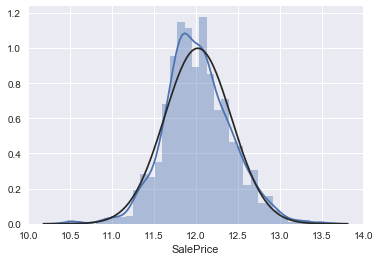

In [125]:
#sanity check
sns.distplot(trainnew['SalePrice'] , fit=norm);

In [136]:
#sanity check
print(np.exp(y.mean()))

print(np.exp(12.024))

166716.107232
166708.157041


In [167]:
#import regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y)


#import eval metrics 

from sklearn import metrics
import numpy as np 


#define a function that will accept a list of feature and return RMSE



def train_test_rmse(df, feature_cols):
    x = df[feature_cols]
    y = df.SalePrice
    
    
    
    x_train, x_test, y_train, y_test = train_test_split(x,y)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    
    y_pred = lr.predict(x_test)
    
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))



In [169]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[('OverallQual', 0.10655953917327794), ('GrLivArea', 0.00023618853964895822), ('GarageCars', 0.093633453550375681), ('TotalBsmtSF', 9.9154553653882648e-05), ('FullBath', -0.0018338669211114397), ('YearBuilt', 0.0023724130951318085)]


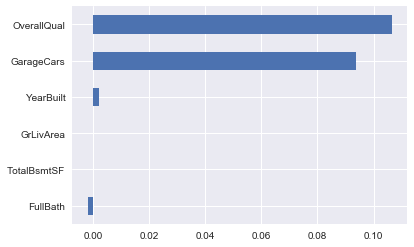

In [170]:
print(list(zip(feature_cols, lr.coef_)))
pd.Series(dict(zip(feature_cols, lr.coef_))).sort_values().plot.barh();

In [162]:
"""#create a feature matrix using the features discovered to have high correlation to SalePrice

feature_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
x = trainnew[feature_cols]

#create response vector = nomralized SalePrice of the cleaned data set

y = trainnew.SalePrice"""

"#create a feature matrix using the features discovered to have high correlation to SalePrice\n\nfeature_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']\nx = trainnew[feature_cols]\n\n#create response vector = nomralized SalePrice of the cleaned data set\n\ny = trainnew.SalePrice"

Reg1: RMSE 0.156765938741
Reg1: Coef [('OverallQual', 0.10655953917327794), ('GrLivArea', 0.00023618853964895822), ('GarageCars', 0.093633453550375681), ('TotalBsmtSF', 9.9154553653882648e-05), ('FullBath', -0.0018338669211114397), ('YearBuilt', 0.0023724130951318085)]
Reg2: RMSE 0.228784593707
Reg2: Coef [('OverallQual', 0.10655953917327794), ('GrLivArea', 0.00023618853964895822), ('GarageCars', 0.093633453550375681), ('TotalBsmtSF', 9.9154553653882648e-05), ('FullBath', -0.0018338669211114397), ('YearBuilt', 0.0023724130951318085)]


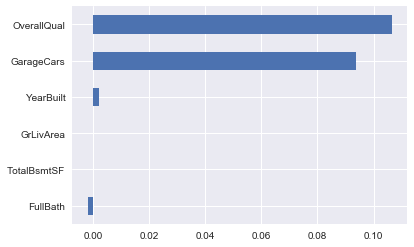

In [176]:
#compare different features ***why is this returning all coefficients in Reg 2.. shouldn't it only be showing "OverallQual"?
#want to add in the intercept as a returned item, however getting an error : lr.intercept_
#Reg 1:

print("Reg1: RMSE",train_test_rmse(trainnew, ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','YearBuilt'
]))

print("Reg1: Coef",list(zip(feature_cols, lr.coef_)))
pd.Series(dict(zip(feature_cols, lr.coef_))).sort_values().plot.barh();

#Reg 2: 
print("Reg2: RMSE",train_test_rmse(trainnew, ['OverallQual']))

print("Reg2: Coef",list(zip(feature_cols, lr.coef_)))
pd.Series(dict(zip(feature_cols, lr.coef_))).sort_values().plot.barh();

#Reg 3: add highly negative correlated variables



In [159]:
#sanity check 

print("x-shapes:",x.shape)

print(x_train.shape)
print(x_test.shape)

print("y-shapes: ",y.shape)

print(y_train.shape)
print(y_test.shape)

x-shapes: (1459, 6)
(1094, 6)
(365, 6)
y-shapes:  (1459,)
(1094,)
(365,)


In [160]:
#create a regression with the feature column vairables and fit the regression
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[('OverallQual', 0.10760260615937962), ('GrLivArea', 0.00024999831903066438), ('GarageCars', 0.084667374554297695), ('TotalBsmtSF', 0.00010972488242910988), ('FullBath', -0.0035347727661280857), ('YearBuilt', 0.0025259367346852058)]


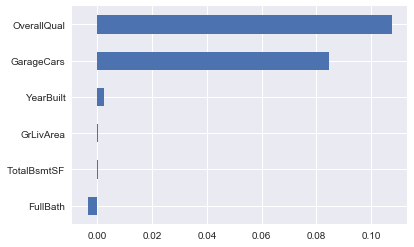

In [147]:
#show feature names and coefficients
print(list(zip(feature_cols, lr.coef_)))

pd.Series(dict(zip(feature_cols, lr.coef_))).sort_values().plot.barh();

In [137]:
#compare to the Null RMSE - the RMSE that could be achieved by always predicting the mean response value.

#train test data

x_train, x_test, y_train, y_test = train_test_split(x,y)
    
#numpy array with shape of y_test
    
y_null = np.zeros_like(y_test, dtype=float)
    
#fill the array with the mean value of y_test
y_null.fill(y_test.mean())

#compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.42623154937963781

In [ ]:
print(lr.intercept_)
print(lr.coef_)